In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

C:\Users\ROHITH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data

In [2]:
df = pd.read_csv("auto-mpg.data",names=['MPG', 'Cylinders', 'Displacements', 'Horsepower', 'Weight',
              'Acceleration', 'Year', 'Origin', 'Car_name'], delim_whitespace = True)
print("Shape of df :",df.shape)
df.head()

Shape of df : (406, 9)


,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin,Car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


Here we can see that the Car_name also includes the Car manufacturer as the first word.So we can extract that to find the any relation with the MPG

In [3]:
model = []
for x in df["Car_name"]:
    x = x.split()
    model.append(x[0])        

In [4]:
df["Manufacturer"] = model
df.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Origin,Car_name,Manufacturer
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


In [5]:
#Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      406 non-null    float64
 2   Displacements  406 non-null    float64
 3   Horsepower     400 non-null    float64
 4   Weight         406 non-null    float64
 5   Acceleration   406 non-null    float64
 6   Year           406 non-null    float64
 7   Origin         406 non-null    float64
 8   Car_name       406 non-null    object 
 9   Manufacturer   406 non-null    object 
dtypes: float64(8), object(2)
memory usage: 31.8+ KB


In [6]:
df["Manufacturer"].value_counts()

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
volvo             6
chrysler          6
vw                6
renault           5
saab              5
opel              4
subaru            4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
mercedes          1
toyouta           1
triumph           1
vokswagen         1
chevroelt         1
citroen           1
hi                1
capri             1
nissan            1
Name: Manufacturer, dtype: int64

In [7]:
brand = df.dropna(subset=["MPG"])
brand = df['Manufacturer'].value_counts()[:5]
brand = list(brand.index)                 

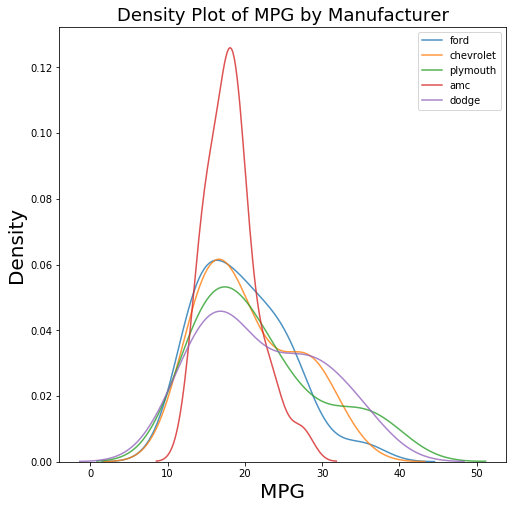

In [8]:
#Plot of distribution of MPG for Manufacturer
from IPython.core.pylabtools import figsize
figsize(8,8)

# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = df[df['Manufacturer'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['MPG'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MPG', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of MPG by Manufacturer', size = 18)
plt.show()

Most of the top Manufacturer has the density plot overlapping so that the difference might not be significant.

## Exploratory Data Analysis

In [9]:
#checking for null values
df.isnull().sum()

MPG              8
Cylinders        0
Displacements    0
Horsepower       6
Weight           0
Acceleration     0
Year             0
Origin           0
Car_name         0
Manufacturer     0
dtype: int64

In [10]:
#removing the null values
df = df.dropna()
df.isnull().sum()

MPG              0
Cylinders        0
Displacements    0
Horsepower       0
Weight           0
Acceleration     0
Year             0
Origin           0
Car_name         0
Manufacturer     0
dtype: int64

In [11]:
#Since we can replace the origin as USA,Europe and Japan from 1,2 and 3 respectively
#Dummy coding (one hot encoding)
origin = df.pop('Origin')

df['USA'] = (origin == 1)*1.0
df['Europe'] = (origin == 2)*1.0
df['Japan'] = (origin == 3)*1.0

In [12]:
df.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,Car_name,Manufacturer,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,chevrolet,1.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,buick,1.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,plymouth,1.0,0.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,amc,1.0,0.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,ford,1.0,0.0,0.0


In [13]:
#summary of the statistics
df.describe()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [14]:
#lets drop the unwanted columns in building the model
df = df.drop('Car_name',axis=1)
df = df.drop('Manufacturer',axis=1)

## Single Variable Plot

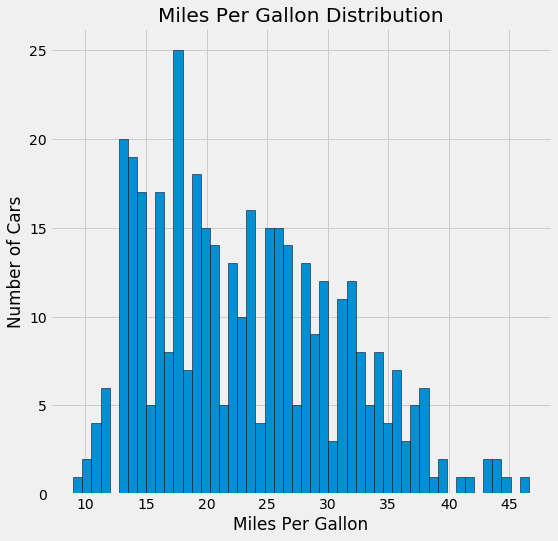

In [15]:
#MPG distribution among the cars 
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df["MPG"].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('Miles Per Gallon'); plt.ylabel('Number of Cars'); 
plt.title('Miles Per Gallon Distribution');
plt.show()

From this above plot we can see that most of the cars in our dataset has MPG around 15 to 30. 

## Correlation between our features and targets

To check the correlation we will use the pearson correlation coefficient.

In [16]:
corr_df = df.corr()
corr_df["MPG"].sort_values(ascending=False)

MPG              1.000000
Year             0.580541
Japan            0.451454
Acceleration     0.423329
Europe           0.244313
USA             -0.565161
Cylinders       -0.777618
Horsepower      -0.778427
Displacements   -0.805127
Weight          -0.832244
Name: MPG, dtype: float64

As we can see that there are several strong correlations between the MPG and other variables.

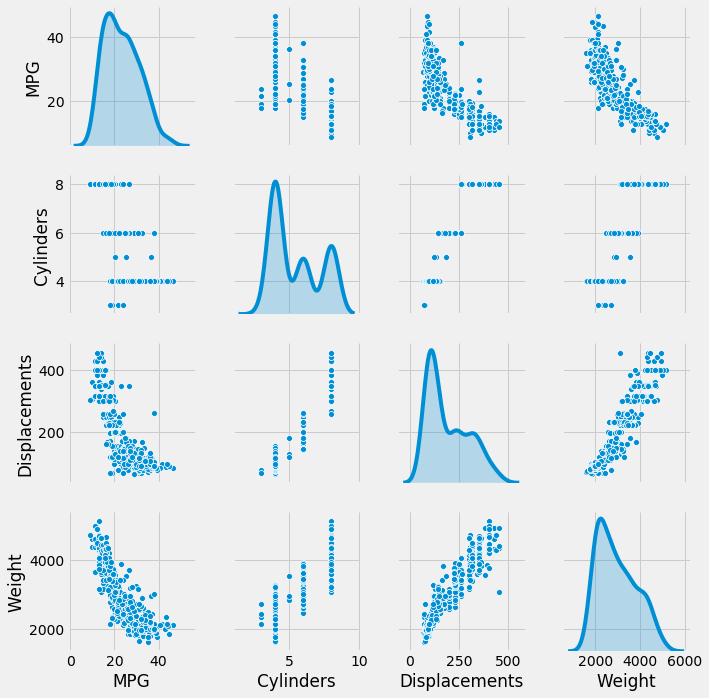

In [17]:
#Inspect the data
sns.pairplot(df[["MPG", 'Cylinders', 'Displacements', 'Weight']], diag_kind='kde')

From the above pairplot we can see that the MPG is having a negative relation with respect to displacement and weight.
Also we can see that Displacement and Weight is having a linear relation.

## Splitting the data into Training and Testing set

In [18]:
X=df.drop("MPG",axis=1)
y=df['MPG']
print("Shape of features :",X.shape)
print("Shape of labels :",y.shape)

Shape of features : (392, 9)
Shape of labels : (392,)


In [19]:
X

,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,USA,Europe,Japan
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.0,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,0.0,0.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,0.0,1.0,0.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,0.0,0.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,0.0,0.0


In [20]:
#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,Cylinders,Displacements,Horsepower,Weight,Acceleration,Year,USA,Europe,Japan
227,4.0,85.0,70.0,1945.0,16.8,77.0,0.0,0.0,1.0
263,6.0,225.0,100.0,3430.0,17.2,78.0,1.0,0.0,0.0
308,4.0,105.0,70.0,2200.0,13.2,79.0,1.0,0.0,0.0
200,6.0,200.0,81.0,3012.0,17.6,76.0,1.0,0.0,0.0
64,4.0,113.0,95.0,2278.0,15.5,72.0,0.0,0.0,1.0


## Data Normalization

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [22]:
#Saving the sc transform
pickle.dump(sc, open('scaler.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [23]:
X_train.keys()

Index(['Cylinders', 'Displacements', 'Horsepower', 'Weight', 'Acceleration',
       'Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [24]:
len(X_train.keys())

9

In [25]:
from keras.models import Sequential
from keras.layers import Dense 
# Initialising the ANN
model = Sequential()

# Adding the input layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the hidden layers
model.add(Dense(units = 64,activation='relu'))
# Adding the output layer
model.add(Dense(units=1))          
          
# Compiling the ANN 
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [31]:
model_history=model.fit(X_train_std, y_train, batch_size =100,epochs = 1000)

Epoch 1/1000
313/313 [==============================] - 0s 19us/step - loss: 3.6923 - mean_absolute_error: 1.3425 - mean_squared_error: 3.6923
Epoch 2/1000
313/313 [==============================] - 0s 19us/step - loss: 3.6828 - mean_absolute_error: 1.3378 - mean_squared_error: 3.6828
Epoch 3/1000
313/313 [==============================] - 0s 18us/step - loss: 3.6823 - mean_absolute_error: 1.3403 - mean_squared_error: 3.6823
Epoch 4/1000
313/313 [==============================] - 0s 19us/step - loss: 3.7537 - mean_absolute_error: 1.3501 - mean_squared_error: 3.7537
Epoch 5/1000
313/313 [==============================] - 0s 25us/step - loss: 3.8391 - mean_absolute_error: 1.3653 - mean_squared_error: 3.8391
Epoch 6/1000
313/313 [==============================] - 0s 19us/step - loss: 3.7394 - mean_absolute_error: 1.3512 - mean_squared_error: 3.7394
Epoch 7/1000
313/313 [==============================] - 0s 25us/step - loss: 3.8016 - mean_absolute_error: 1.3666 - mean_squared_error: 3.8016

313/313 [==============================] - 0s 13us/step - loss: 3.7092 - mean_absolute_error: 1.3404 - mean_squared_error: 3.7092
Epoch 58/1000
313/313 [==============================] - 0s 19us/step - loss: 3.6756 - mean_absolute_error: 1.3446 - mean_squared_error: 3.6756
Epoch 59/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6581 - mean_absolute_error: 1.3499 - mean_squared_error: 3.6581
Epoch 60/1000
313/313 [==============================] - 0s 19us/step - loss: 3.7368 - mean_absolute_error: 1.3533 - mean_squared_error: 3.7368
Epoch 61/1000
313/313 [==============================] - 0s 13us/step - loss: 3.6492 - mean_absolute_error: 1.3417 - mean_squared_error: 3.6492
Epoch 62/1000
313/313 [==============================] - 0s 13us/step - loss: 3.5992 - mean_absolute_error: 1.3322 - mean_squared_error: 3.5992
Epoch 63/1000
313/313 [==============================] - 0s 19us/step - loss: 3.5857 - mean_absolute_error: 1.3203 - mean_squared_error: 3.5857
Epoch 

313/313 [==============================] - 0s 13us/step - loss: 3.6761 - mean_absolute_error: 1.3432 - mean_squared_error: 3.6761
Epoch 114/1000
313/313 [==============================] - 0s 16us/step - loss: 3.5756 - mean_absolute_error: 1.3262 - mean_squared_error: 3.5756
Epoch 115/1000
313/313 [==============================] - 0s 13us/step - loss: 3.5686 - mean_absolute_error: 1.3296 - mean_squared_error: 3.5686
Epoch 116/1000
313/313 [==============================] - 0s 16us/step - loss: 3.5880 - mean_absolute_error: 1.3161 - mean_squared_error: 3.5880
Epoch 117/1000
313/313 [==============================] - 0s 16us/step - loss: 3.4826 - mean_absolute_error: 1.3124 - mean_squared_error: 3.4826
Epoch 118/1000
313/313 [==============================] - 0s 13us/step - loss: 3.5670 - mean_absolute_error: 1.3401 - mean_squared_error: 3.5670
Epoch 119/1000
313/313 [==============================] - 0s 19us/step - loss: 3.4475 - mean_absolute_error: 1.3017 - mean_squared_error: 3.4475


313/313 [==============================] - 0s 16us/step - loss: 3.3470 - mean_absolute_error: 1.2739 - mean_squared_error: 3.3470
Epoch 170/1000
313/313 [==============================] - 0s 16us/step - loss: 3.3501 - mean_absolute_error: 1.2712 - mean_squared_error: 3.3501
Epoch 171/1000
313/313 [==============================] - 0s 16us/step - loss: 3.3287 - mean_absolute_error: 1.2739 - mean_squared_error: 3.3287
Epoch 172/1000
313/313 [==============================] - 0s 16us/step - loss: 3.2803 - mean_absolute_error: 1.2492 - mean_squared_error: 3.2803
Epoch 173/1000
313/313 [==============================] - 0s 22us/step - loss: 3.3921 - mean_absolute_error: 1.2668 - mean_squared_error: 3.3921
Epoch 174/1000
313/313 [==============================] - 0s 16us/step - loss: 3.3281 - mean_absolute_error: 1.2582 - mean_squared_error: 3.3281
Epoch 175/1000
313/313 [==============================] - 0s 19us/step - loss: 3.2905 - mean_absolute_error: 1.2640 - mean_squared_error: 3.2905


313/313 [==============================] - 0s 19us/step - loss: 3.2708 - mean_absolute_error: 1.2643 - mean_squared_error: 3.2708
Epoch 226/1000
313/313 [==============================] - 0s 13us/step - loss: 3.2180 - mean_absolute_error: 1.2405 - mean_squared_error: 3.2180
Epoch 227/1000
313/313 [==============================] - 0s 13us/step - loss: 3.2000 - mean_absolute_error: 1.2410 - mean_squared_error: 3.2000
Epoch 228/1000
313/313 [==============================] - 0s 16us/step - loss: 3.1538 - mean_absolute_error: 1.2309 - mean_squared_error: 3.1538
Epoch 229/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1610 - mean_absolute_error: 1.2291 - mean_squared_error: 3.1610
Epoch 230/1000
313/313 [==============================] - 0s 19us/step - loss: 3.1680 - mean_absolute_error: 1.2295 - mean_squared_error: 3.1680
Epoch 231/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1521 - mean_absolute_error: 1.2265 - mean_squared_error: 3.1521


313/313 [==============================] - 0s 19us/step - loss: 3.0640 - mean_absolute_error: 1.1926 - mean_squared_error: 3.0640
Epoch 282/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1738 - mean_absolute_error: 1.2173 - mean_squared_error: 3.1738
Epoch 283/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1475 - mean_absolute_error: 1.2176 - mean_squared_error: 3.1475
Epoch 284/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1231 - mean_absolute_error: 1.2172 - mean_squared_error: 3.1231
Epoch 285/1000
313/313 [==============================] - 0s 16us/step - loss: 3.1227 - mean_absolute_error: 1.2322 - mean_squared_error: 3.1227
Epoch 286/1000
313/313 [==============================] - 0s 22us/step - loss: 3.2437 - mean_absolute_error: 1.2566 - mean_squared_error: 3.2437
Epoch 287/1000
313/313 [==============================] - 0s 13us/step - loss: 3.1945 - mean_absolute_error: 1.2418 - mean_squared_error: 3.1945


313/313 [==============================] - 0s 16us/step - loss: 3.0301 - mean_absolute_error: 1.2143 - mean_squared_error: 3.0301
Epoch 338/1000
313/313 [==============================] - 0s 19us/step - loss: 2.9945 - mean_absolute_error: 1.2011 - mean_squared_error: 2.9945
Epoch 339/1000
313/313 [==============================] - 0s 16us/step - loss: 2.9242 - mean_absolute_error: 1.1741 - mean_squared_error: 2.9242
Epoch 340/1000
313/313 [==============================] - 0s 13us/step - loss: 2.9400 - mean_absolute_error: 1.1788 - mean_squared_error: 2.9400
Epoch 341/1000
313/313 [==============================] - 0s 16us/step - loss: 2.9732 - mean_absolute_error: 1.1834 - mean_squared_error: 2.9732
Epoch 342/1000
313/313 [==============================] - 0s 13us/step - loss: 2.8931 - mean_absolute_error: 1.1638 - mean_squared_error: 2.8931
Epoch 343/1000
313/313 [==============================] - 0s 19us/step - loss: 3.0261 - mean_absolute_error: 1.2284 - mean_squared_error: 3.0261


313/313 [==============================] - 0s 16us/step - loss: 2.8936 - mean_absolute_error: 1.1745 - mean_squared_error: 2.8936
Epoch 394/1000
313/313 [==============================] - 0s 16us/step - loss: 2.8682 - mean_absolute_error: 1.1650 - mean_squared_error: 2.8682
Epoch 395/1000
313/313 [==============================] - 0s 13us/step - loss: 2.8583 - mean_absolute_error: 1.1628 - mean_squared_error: 2.8583
Epoch 396/1000
313/313 [==============================] - 0s 13us/step - loss: 2.8671 - mean_absolute_error: 1.1630 - mean_squared_error: 2.8671
Epoch 397/1000
313/313 [==============================] - 0s 16us/step - loss: 2.8898 - mean_absolute_error: 1.1813 - mean_squared_error: 2.8898
Epoch 398/1000
313/313 [==============================] - 0s 19us/step - loss: 2.7942 - mean_absolute_error: 1.1425 - mean_squared_error: 2.7942
Epoch 399/1000
313/313 [==============================] - 0s 16us/step - loss: 2.8401 - mean_absolute_error: 1.1550 - mean_squared_error: 2.8401


313/313 [==============================] - 0s 16us/step - loss: 2.7026 - mean_absolute_error: 1.1272 - mean_squared_error: 2.7026
Epoch 450/1000
313/313 [==============================] - 0s 13us/step - loss: 2.7513 - mean_absolute_error: 1.1339 - mean_squared_error: 2.7513
Epoch 451/1000
313/313 [==============================] - 0s 13us/step - loss: 2.7486 - mean_absolute_error: 1.1289 - mean_squared_error: 2.7486
Epoch 452/1000
313/313 [==============================] - 0s 16us/step - loss: 2.7237 - mean_absolute_error: 1.1229 - mean_squared_error: 2.7237
Epoch 453/1000
313/313 [==============================] - 0s 13us/step - loss: 2.7406 - mean_absolute_error: 1.1294 - mean_squared_error: 2.7406
Epoch 454/1000
313/313 [==============================] - 0s 16us/step - loss: 2.7325 - mean_absolute_error: 1.1264 - mean_squared_error: 2.7325
Epoch 455/1000
313/313 [==============================] - 0s 13us/step - loss: 2.7278 - mean_absolute_error: 1.1241 - mean_squared_error: 2.7278


313/313 [==============================] - 0s 13us/step - loss: 2.6124 - mean_absolute_error: 1.1043 - mean_squared_error: 2.6124
Epoch 506/1000
313/313 [==============================] - 0s 13us/step - loss: 2.5838 - mean_absolute_error: 1.0924 - mean_squared_error: 2.5838
Epoch 507/1000
313/313 [==============================] - 0s 13us/step - loss: 2.6392 - mean_absolute_error: 1.1005 - mean_squared_error: 2.6392
Epoch 508/1000
313/313 [==============================] - 0s 19us/step - loss: 2.6441 - mean_absolute_error: 1.1019 - mean_squared_error: 2.6441
Epoch 509/1000
313/313 [==============================] - 0s 13us/step - loss: 2.6139 - mean_absolute_error: 1.1077 - mean_squared_error: 2.6139
Epoch 510/1000
313/313 [==============================] - 0s 16us/step - loss: 2.5997 - mean_absolute_error: 1.0977 - mean_squared_error: 2.5997
Epoch 511/1000
313/313 [==============================] - 0s 16us/step - loss: 2.6624 - mean_absolute_error: 1.1232 - mean_squared_error: 2.6624


313/313 [==============================] - 0s 16us/step - loss: 2.4924 - mean_absolute_error: 1.0802 - mean_squared_error: 2.4924
Epoch 562/1000
313/313 [==============================] - 0s 19us/step - loss: 2.5467 - mean_absolute_error: 1.1028 - mean_squared_error: 2.5467
Epoch 563/1000
313/313 [==============================] - 0s 13us/step - loss: 2.5470 - mean_absolute_error: 1.1049 - mean_squared_error: 2.5470
Epoch 564/1000
313/313 [==============================] - 0s 22us/step - loss: 2.5438 - mean_absolute_error: 1.0960 - mean_squared_error: 2.5438
Epoch 565/1000
313/313 [==============================] - 0s 16us/step - loss: 2.5304 - mean_absolute_error: 1.0818 - mean_squared_error: 2.5304
Epoch 566/1000
313/313 [==============================] - 0s 22us/step - loss: 2.5783 - mean_absolute_error: 1.0938 - mean_squared_error: 2.5783
Epoch 567/1000
313/313 [==============================] - 0s 13us/step - loss: 2.6209 - mean_absolute_error: 1.1071 - mean_squared_error: 2.6209


313/313 [==============================] - 0s 16us/step - loss: 2.4288 - mean_absolute_error: 1.0723 - mean_squared_error: 2.4288
Epoch 617/1000
313/313 [==============================] - 0s 16us/step - loss: 2.3906 - mean_absolute_error: 1.0660 - mean_squared_error: 2.3906
Epoch 618/1000
313/313 [==============================] - 0s 16us/step - loss: 2.4337 - mean_absolute_error: 1.0677 - mean_squared_error: 2.4337
Epoch 619/1000
313/313 [==============================] - 0s 16us/step - loss: 2.6218 - mean_absolute_error: 1.1022 - mean_squared_error: 2.6218
Epoch 620/1000
313/313 [==============================] - 0s 16us/step - loss: 2.4622 - mean_absolute_error: 1.0583 - mean_squared_error: 2.4622
Epoch 621/1000
313/313 [==============================] - 0s 13us/step - loss: 2.4657 - mean_absolute_error: 1.0856 - mean_squared_error: 2.4657
Epoch 622/1000
313/313 [==============================] - 0s 22us/step - loss: 2.4557 - mean_absolute_error: 1.0853 - mean_squared_error: 2.4557


313/313 [==============================] - 0s 13us/step - loss: 2.3767 - mean_absolute_error: 1.0535 - mean_squared_error: 2.3767
Epoch 673/1000
313/313 [==============================] - 0s 22us/step - loss: 2.4112 - mean_absolute_error: 1.0823 - mean_squared_error: 2.4112
Epoch 674/1000
313/313 [==============================] - 0s 16us/step - loss: 2.3749 - mean_absolute_error: 1.0517 - mean_squared_error: 2.3749
Epoch 675/1000
313/313 [==============================] - 0s 16us/step - loss: 2.3841 - mean_absolute_error: 1.0545 - mean_squared_error: 2.3841
Epoch 676/1000
313/313 [==============================] - 0s 16us/step - loss: 2.4322 - mean_absolute_error: 1.0710 - mean_squared_error: 2.4322
Epoch 677/1000
313/313 [==============================] - 0s 13us/step - loss: 2.4235 - mean_absolute_error: 1.0544 - mean_squared_error: 2.4235
Epoch 678/1000
313/313 [==============================] - 0s 19us/step - loss: 2.3609 - mean_absolute_error: 1.0333 - mean_squared_error: 2.3609


313/313 [==============================] - 0s 16us/step - loss: 2.2773 - mean_absolute_error: 1.0163 - mean_squared_error: 2.2773
Epoch 729/1000
313/313 [==============================] - 0s 13us/step - loss: 2.2710 - mean_absolute_error: 1.0199 - mean_squared_error: 2.2710
Epoch 730/1000
313/313 [==============================] - 0s 16us/step - loss: 2.2765 - mean_absolute_error: 1.0333 - mean_squared_error: 2.2765
Epoch 731/1000
313/313 [==============================] - 0s 13us/step - loss: 2.3254 - mean_absolute_error: 1.0539 - mean_squared_error: 2.3254
Epoch 732/1000
313/313 [==============================] - 0s 13us/step - loss: 2.3300 - mean_absolute_error: 1.0424 - mean_squared_error: 2.3300
Epoch 733/1000
313/313 [==============================] - 0s 16us/step - loss: 2.3036 - mean_absolute_error: 1.0403 - mean_squared_error: 2.3036
Epoch 734/1000
313/313 [==============================] - 0s 13us/step - loss: 2.2259 - mean_absolute_error: 1.0053 - mean_squared_error: 2.2259


313/313 [==============================] - 0s 17us/step - loss: 2.2782 - mean_absolute_error: 1.0465 - mean_squared_error: 2.2782
Epoch 785/1000
313/313 [==============================] - 0s 13us/step - loss: 2.1940 - mean_absolute_error: 1.0071 - mean_squared_error: 2.1940
Epoch 786/1000
313/313 [==============================] - 0s 13us/step - loss: 2.2499 - mean_absolute_error: 1.0411 - mean_squared_error: 2.2499
Epoch 787/1000
313/313 [==============================] - 0s 13us/step - loss: 2.2319 - mean_absolute_error: 1.0218 - mean_squared_error: 2.2319
Epoch 788/1000
313/313 [==============================] - 0s 22us/step - loss: 2.2749 - mean_absolute_error: 1.0348 - mean_squared_error: 2.2749
Epoch 789/1000
313/313 [==============================] - 0s 13us/step - loss: 2.1958 - mean_absolute_error: 1.0205 - mean_squared_error: 2.1958
Epoch 790/1000
313/313 [==============================] - 0s 19us/step - loss: 2.1759 - mean_absolute_error: 0.9983 - mean_squared_error: 2.1759


313/313 [==============================] - 0s 19us/step - loss: 2.0697 - mean_absolute_error: 0.9760 - mean_squared_error: 2.0697
Epoch 841/1000
313/313 [==============================] - 0s 16us/step - loss: 2.1135 - mean_absolute_error: 0.9849 - mean_squared_error: 2.1135
Epoch 842/1000
313/313 [==============================] - 0s 16us/step - loss: 2.1399 - mean_absolute_error: 0.9836 - mean_squared_error: 2.1399
Epoch 843/1000
313/313 [==============================] - 0s 16us/step - loss: 2.1005 - mean_absolute_error: 0.9696 - mean_squared_error: 2.1005
Epoch 844/1000
313/313 [==============================] - 0s 13us/step - loss: 2.2209 - mean_absolute_error: 1.0299 - mean_squared_error: 2.2209
Epoch 845/1000
313/313 [==============================] - 0s 19us/step - loss: 2.2371 - mean_absolute_error: 1.0251 - mean_squared_error: 2.2371
Epoch 846/1000
313/313 [==============================] - 0s 13us/step - loss: 2.1894 - mean_absolute_error: 1.0187 - mean_squared_error: 2.1894


313/313 [==============================] - 0s 19us/step - loss: 1.9837 - mean_absolute_error: 0.9427 - mean_squared_error: 1.9837
Epoch 897/1000
313/313 [==============================] - 0s 16us/step - loss: 1.9794 - mean_absolute_error: 0.9423 - mean_squared_error: 1.9794
Epoch 898/1000
313/313 [==============================] - 0s 11us/step - loss: 1.9842 - mean_absolute_error: 0.9424 - mean_squared_error: 1.9842
Epoch 899/1000
313/313 [==============================] - 0s 19us/step - loss: 1.9984 - mean_absolute_error: 0.9474 - mean_squared_error: 1.9984
Epoch 900/1000
313/313 [==============================] - 0s 14us/step - loss: 1.9731 - mean_absolute_error: 0.9387 - mean_squared_error: 1.9731
Epoch 901/1000
313/313 [==============================] - 0s 20us/step - loss: 2.0548 - mean_absolute_error: 0.9608 - mean_squared_error: 2.0548
Epoch 902/1000
313/313 [==============================] - 0s 13us/step - loss: 2.0429 - mean_absolute_error: 0.9560 - mean_squared_error: 2.0429


313/313 [==============================] - 0s 15us/step - loss: 2.0208 - mean_absolute_error: 0.9535 - mean_squared_error: 2.0208
Epoch 953/1000
313/313 [==============================] - 0s 27us/step - loss: 1.9610 - mean_absolute_error: 0.9328 - mean_squared_error: 1.9610
Epoch 954/1000
313/313 [==============================] - 0s 16us/step - loss: 2.0065 - mean_absolute_error: 0.9589 - mean_squared_error: 2.0065
Epoch 955/1000
313/313 [==============================] - 0s 22us/step - loss: 1.9641 - mean_absolute_error: 0.9383 - mean_squared_error: 1.9641
Epoch 956/1000
313/313 [==============================] - 0s 16us/step - loss: 1.9692 - mean_absolute_error: 0.9486 - mean_squared_error: 1.9692
Epoch 957/1000
313/313 [==============================] - 0s 13us/step - loss: 1.9422 - mean_absolute_error: 0.9345 - mean_squared_error: 1.9422
Epoch 958/1000
313/313 [==============================] - 0s 16us/step - loss: 1.9476 - mean_absolute_error: 0.9368 - mean_squared_error: 1.9476


In [28]:
prediction=model.predict(X_test_std)

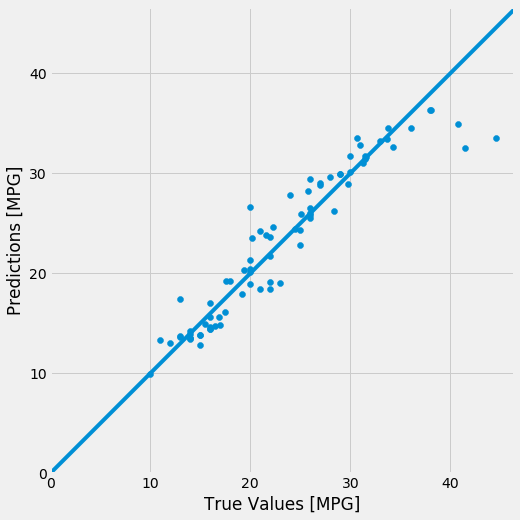

In [29]:
plt.scatter(y_test,prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [30]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)

rmse=np.sqrt(mean_squared_error(y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(y_test,prediction))

RMSE:  2.5290440894726167
R_square: 0.8970954612395846


In [32]:
model.save("model.h5")